# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

  The choosen dataset contains data of 10,000 movies from The Movie Database (TMDb).

##### The column names in the dataset are listed below and explains the data they hold:
- **_id_** - movie id
- **_imdb_id_** - imdb id
- **_popularity_** - how popular the movie is
- **_budget_** - amount of money spent to make the movie
- **_revenue_** - income recieved for making the movie
- **_original_title_** - title of the movie
- **_cast_** - the main actors and actresses in the movie
- **_homepage_** - website showing information about movie
- **_director_** - movie director
- **_tagline_** - quote from movie
- **_keywords_** - keywords about movie
- **_overview_** - explaination of what movie is about
- **_runtime_** - minutes the movie lasted
- **_genres_** - genres that movies fit in
- **_production_companies_** - companies that funded creating the movie
- **_release_date_** - date movie was released
- **_vote_count_** - amount of votes for movie
- **_vote_average_** - average of votes for movie
- **_release_year_** - year movie was released
- **_budget_adj_** - amount of money spent to make movie in terms of 2010 dollars
- **_revenue_adj_** - amount of money earned from making movie in terms of 2010 dollars 

### Question(s) for Analysis

### 1. Which genres are most popular from year to year?
### 2. What movie genres will Tom Cruise most likely be asked to star in?

In [207]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### **Load CSV File & Display First Five CSV Raw Data Lines:**

In [208]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

df = pd.read_csv('tmdb-movies.csv') # loads csv file
df.head() # displays first 5 lines of raw data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### **Display 'keywords' column of CSV file:**

In [209]:
df['keywords'] # displays "keywords" column data (ONLY column that was NOT SHOWN)

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

#### **Display CSV File Size:**

In [210]:
df.shape # displays size of dataframe 

(10866, 21)

#### **Display Amount of Data in each CSV Column:**

In [211]:
df.count() # displays amount of NON-missing data in each column (only want to know LOCATION of null values in Columns)

# if ".isnull()", "isna()", or ".notnull()" is used, it will display "True" or "False" in columns

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

##### The data above displays the amount of data values each column has. Since the dataset has 10866 rows, any column that has less than 10866 data values has null values. This shows that the following columns have null values: **imdb_id**, **cast**, **homepage**, **director**, **tagline**, **keywords**, overview, genres, and production_companies.


### Data Cleaning

 

#### **Replace Null Values in CSV File with Zero & Display Last Five CSV Raw Data Lines:**

In [212]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.fillna(0, inplace=True) # replaces null values with 0 (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
df[['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']].tail() # displays last 5 lines of raw data for columns: 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', and 'production_companies'

,imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies
10861,tt0060371,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,Bruce Brown Films
10862,tt0060472,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...
10863,tt0060161,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,Mystery|Comedy,Mosfilm
10864,tt0061177,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",Action|Comedy,Benedict Pictures Corp.
10865,tt0060666,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,0,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,Horror,Norm-Iris


Since the previous code cell confirmed that the dataset has null values, those null values, _NaN_, need to be replaced with a reasonable value. The first line of code in the cell above replaces the null values with 0. The second line of code displays the last five rows of raw data to show where some of the null values have been replaced with 0. If a row has a data value of 0, it means the row does not have the data about the movie pertaining to the column it is under.

#### **Obtain & Display Duplicated Rows in CSV File:**

In [213]:
duplicated_rows = df[df.duplicated()] # obtains duplicated rows ONLY
print(duplicated_rows) # displays duplicated rows

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...        0   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


##### In the code cell above, the first line of code searches and obtains rows with duplicated data in the dataset. The second line of code displays any duplicated rows that were found. The result from the code cell shows that row 2090 is the only duplicated row in the dataset.

#### **Display Amount of Duplicated Rows:**

In [214]:
sum(df.duplicated()) # displays amount of duplicated rows

1

##### The code in the cell above displays the total amount of duplicated rows in the dataset. The result shows that there is only **1** duplicated row in the dataset, confirming that row 2090 is the only duplicated row.

#### **Delete Duplicated Row & Display Rows from 2089 to 2091:**

In [215]:
df.drop_duplicates(inplace=False) # drops or deletes duplicated rows (MUST USE "inplace=False" TO ENSURE DATA FRAME IS MODIFIED)
df.iloc[[2089, 2090, 2091]] # displays rows 2089-2091 to check if row 2090 was dropped

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,0,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,0,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,...,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


##### Since there is one duplicated cell in the dataset, it needs to be removed. In the cell above, the first line of code drops the duplicated row in the dataset. The second line displays rows 2089, 2090, and 2091. The second code line is used to confirm if row 2090 was dropped.

<a id='eda'></a>
## Exploratory Data Analysis




### Which genres are most popular from year to year?

#### **Create Dataframes for Three Comparisons:**

In [216]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_genre_popularity_comparison_1 = pd.DataFrame([[0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0]],
                                                index = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 
                                                         'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War'],
                                                columns=['2008', '2009']) # creates dataframe to hold popularity of genre types for first comparison

df_genre_popularity_comparison_2 = pd.DataFrame([[0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0]],
                                                index=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
                                                       'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War'],
                                                columns=['2009', '2010']) # creates dataframe to hold popularity of genre types for second comparison

df_genre_popularity_comparison_3 = pd.DataFrame([[0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0]],
                                                index = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 
                                                         'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War'],
                                                columns=['2010', '2011']) # creates dataframe to hold popularity of genre types for third comparison

In the cell above, the code creates three new dataframe to hold the total popularity of each movie genre released from 2008 to 2011 and initalizes all the dataframe index values to zero. The dataframe index values are initialized to zero because data has not been inputted into the dataframe.

One method to find the most popular genres from year to year is to find which genre popularities increased, stayed the same, or decreased by a small amount between two consecutive years and check if those genres had the most popularity for the same consecutive years. This method will be used three times to find and compare three results of popular genres between three pairs of consecutive years. Since two years are the minimum amount needed to find the most popular genres from year to year, the genre popularity will be compared within a range of four years to make the three comparisons of the genre popularity between 2008-2009, 2009-2010, and 2010-2011. These comparisons will narrow down and corroborate which genres are the most popular from year to year.

#### **Display Dataframe for First Comparison:**

In [217]:
df_genre_popularity_comparison_1 # displays genre popularity dataframe for first comparison

,2008,2009
Action,0,0
Adventure,0,0
Animation,0,0
Comedy,0,0
Crime,0,0
Drama,0,0
Documentary,0,0
Family,0,0
Fantasy,0,0
Foreign,0,0


The code in the cell above displays the **df_genre_popularity_comparison_1** dataframe that was created in the code cell under the **"Create Dataframes for Three Comparisons"** header. 

This shows that the **df_genre_popularity_comparison_1** dataframe is empty and will not have any unwanted data values tampering with the real results when it is time to graph them.

#### **Display Dataframe for Second Comparison:**

In [218]:
df_genre_popularity_comparison_2 # displays genre popularity dataframe for second comparison

,2009,2010
Action,0,0
Adventure,0,0
Animation,0,0
Comedy,0,0
Crime,0,0
Drama,0,0
Documentary,0,0
Family,0,0
Fantasy,0,0
Foreign,0,0


The code in the cell above displays the **df_genre_popularity_comparison_2** dataframe that was created in the code cell under the **"Create Dataframes for Three Comparisons"** header.

This shows that the **df_genre_popularity_comparison_2** dataframe is empty and will not have any unwanted data values tampering with the real results when it is time to graph them.

#### **Display Dataframe for Third Comparison:**

In [219]:
df_genre_popularity_comparison_3 # displays genre popularity dataframe for third comparison

,2010,2011
Action,0,0
Adventure,0,0
Animation,0,0
Comedy,0,0
Crime,0,0
Drama,0,0
Documentary,0,0
Family,0,0
Fantasy,0,0
Foreign,0,0


The code in the cell above displays the **df_genre_popularity_comparison_3** dataframe that was created in the code cell under the **"Create Dataframes for Three Comparisons"** header.

This shows that the **df_genre_popularity_comparison_3** dataframe is empty and will not have any unwanted data values tampering with the real results when it is time to graph them.

#### **Create Dataframes to Separate Movies Released in 2008, 2009, 2010, and 2011 By Year:**

In [220]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_2008 = df[df['release_year'] == 2008] # creates dataframe with movies released in 2008
df_2009 = df[df['release_year'] == 2009] # creates dataframe with movies released in 2009
df_2010 = df[df['release_year'] == 2010] # creates dataframe with movies released in 2010
df_2011 = df[df['release_year'] == 2011] # creates dataframe with movies released in 2011

The code in the cell above creates four dataframes to hold the movies released during 2008-2011 separately. 

To fill the genre popularity dataframe with the appropriate values, the popularity needs to be distinguished by the year the movie was released and the movie genre. Since there are less years to differentiate the popularity by, the four dataframes were created to hold the movies based on the release year from 2008 to 2011.

#### **Create Series Array for Genre Types:**

In [221]:
index_names = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 
               'TV Movie', 'War'] # Series to hold "df_genre_popularity" index names (MUST USE THIS TO PREVENT ERROR FROM OCCURING when accessing data from "df_genre_popularity" dataframe)

The code in the cell above creates a series array to hold the names of each genre in the **df_genre_popularity** dataframe.

This series will allow functions to use to the index word of the **df_genre_popularity** dataframe to access the data inside the dataframe without causing errors.

#### **Create Genre Booleans for Movies Released in 2008:**

In [222]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2008 = df_2008['genres'].str.contains('Action', regex=False) # checks if "genres" column has "Action" ("regex=False" makes case-insensitive)
adventure_boolean_2008 = df_2008['genres'].str.contains('Adventure', regex=False) # checks if row has "Adventure" genre
animation_boolean_2008 = df_2008['genres'].str.contains('Animation', regex=False) # checks if row has "Animation" genre
comedy_boolean_2008 = df_2008['genres'].str.contains('Comedy', regex=False) # checks if Value In Column contains "Comedy"
crime_boolean_2008 = df_2008['genres'].str.contains('Crime', regex=False) # checks if Value In Column contains "Crime"
drama_boolean_2008 = df_2008['genres'].str.contains('Drama', regex=False) # checks if row has "Drama" ("regex=False" makes case-insensitive & MUST INCLUDE .str.)
documentary_boolean_2008 = df_2008['genres'].str.contains('Documentary', regex=False) # checks if row has "Documentary" genre
family_boolean_2008 = df_2008['genres'].str.contains('Family', regex=False) # checks if Value In Column contains "Family"
fantasy_boolean_2008 = df_2008['genres'].str.contains('Fantasy', regex=False) # checks if Value In Column contains "Fantasy"
foreign_boolean_2008 = df_2008['genres'].str.contains('Foreign', regex=False) # checks if row has "Foreign" genre
history_boolean_2008 = df_2008['genres'].str.contains('History', regex=False) # checks if Value In Column contains "History"
horror_boolean_2008 = df_2008['genres'].str.contains('Horror', regex=False) # checks if Value In Column contains "Horror"
music_boolean_2008 = df_2008['genres'].str.contains('Music', regex=False) # checks if row has "Music" genre
mystery_boolean_2008 = df_2008['genres'].str.contains('Mystery', regex=False) # checks if row contains "Mystery"
romance_boolean_2008 = df_2008['genres'].str.contains('Romance', regex=False) # checks if row has "Romance" genre
science_fiction_boolean_2008 = df_2008['genres'].str.contains('Science Fiction', regex=False) # checks if Value In Column contains "Science Fiction"
thriller_boolean_2008 = df_2008['genres'].str.contains('Thriller', regex=False) # checks if row has "Thriller" ("regex=False" makes case-insensitive & MUST INCLUDE .str.)
TV_movie_boolean_2008 = df_2008['genres'].str.contains('TV Movie', regex=False) # checks if row has "TV Movie"
war_boolean_2008 = df_2008['genres'].str.contains('War', regex=False) # checks if row has "War" genre

The code in the cell above creates booleans for each movie genre of movies released in 2008.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2008.

#### **Create Genre Booleans for Movies Released in 2009:**

In [223]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2009 = df_2009['genres'].str.contains('Action', regex=False) # checks if movie has Action
adventure_boolean_2009 = df_2009['genres'].str.contains('Adventure', regex=False) # checks if movie has Adventure
animation_boolean_2009 = df_2009['genres'].str.contains('Animation', regex=False) # checks if movie has Animation
comedy_boolean_2009 = df_2009['genres'].str.contains('Comedy', regex=False) # checks if movie has Comedy
crime_boolean_2009 = df_2009['genres'].str.contains('Crime', regex=False) # checks if movie has Crime
drama_boolean_2009 = df_2009['genres'].str.contains('Drama', regex=False) # checks if movie has Drama
documentary_boolean_2009 = df_2009['genres'].str.contains('Documentary', regex=False) # checks if movie has Documentary
family_boolean_2009 = df_2009['genres'].str.contains('Family', regex=False) # checks if movie has Family
fantasy_boolean_2009 = df_2009['genres'].str.contains('Fantasy', regex=False) # checks if movie has Fantasy
foreign_boolean_2009 = df_2009['genres'].str.contains('Foreign', regex=False) # checks if movie has Foreign
history_boolean_2009 = df_2009['genres'].str.contains('History', regex=False) # checks if movie has History
horror_boolean_2009 = df_2009['genres'].str.contains('Horror', regex=False) # checks if movie has Horror
music_boolean_2009 = df_2009['genres'].str.contains('Music', regex=False) # checks if movie has Music
mystery_boolean_2009 = df_2009['genres'].str.contains('Mystery', regex=False) # checks if movie has Mystery
romance_boolean_2009 = df_2009['genres'].str.contains('Romance', regex=False) # checks if movie has Romance
science_fiction_boolean_2009 = df_2009['genres'].str.contains('Science Fiction', regex=False) # checks if movie has Science Fiction
thriller_boolean_2009 = df_2009['genres'].str.contains('Thriller', regex=False) # checks if movie has Thriller
TV_movie_boolean_2009 = df_2009['genres'].str.contains('TV Movie', regex=False) # checks if movie has TV Movie
war_boolean_2009 = df_2009['genres'].str.contains('War', regex=False) # checks if movie has War

The code in the cell above creates booleans for each movie genre of movies released in 2009.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2009.

#### **Create Genre Booleans for Movies Released in 2010:**

In [224]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2010 = df_2010['genres'].str.contains('Action', regex=False) # checks if movie has Action
adventure_boolean_2010 = df_2010['genres'].str.contains('Adventure', regex=False) # checks if movie has Adventure
animation_boolean_2010 = df_2010['genres'].str.contains('Animation', regex=False) # checks if movie has Animation
comedy_boolean_2010 = df_2010['genres'].str.contains('Comedy', regex=False) # checks if movie has Comedy
crime_boolean_2010 = df_2010['genres'].str.contains('Crime', regex=False) # checks if movie has Crime
drama_boolean_2010 = df_2010['genres'].str.contains('Drama', regex=False) # checks if movie has Drama
documentary_boolean_2010 = df_2010['genres'].str.contains('Documentary', regex=False) # checks if movie has Documentary
family_boolean_2010 = df_2010['genres'].str.contains('Family', regex=False) # checks if movie has Family
fantasy_boolean_2010 = df_2010['genres'].str.contains('Fantasy', regex=False) # checks if movie has Fantasy
foreign_boolean_2010 = df_2010['genres'].str.contains('Foreign', regex=False) # checks if movie has Foreign
history_boolean_2010 = df_2010['genres'].str.contains('History', regex=False) # checks if movie has History
horror_boolean_2010 = df_2010['genres'].str.contains('Horror', regex=False) # checks if movie has Horror
music_boolean_2010 = df_2010['genres'].str.contains('Music', regex=False) # checks if movie has Music
mystery_boolean_2010 = df_2010['genres'].str.contains('Mystery', regex=False) # checks if movie has Mystery
romance_boolean_2010 = df_2010['genres'].str.contains('Romance', regex=False) # checks if movie has Romance
science_fiction_boolean_2010 = df_2010['genres'].str.contains('Science Fiction', regex=False) # checks if movie has Science Fiction
thriller_boolean_2010 = df_2010['genres'].str.contains('Thriller', regex=False) # checks if movie has Thriller
TV_movie_boolean_2010 = df_2010['genres'].str.contains('TV Movie', regex=False) # checks if movie has TV Movie
war_boolean_2010 = df_2010['genres'].str.contains('War', regex=False) # checks if movie has War

The code in the cell above creates booleans for each movie genre of movies released in 2010.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2010.

#### **Create Genre Booleans for Movies Released in 2011:**

In [225]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2011 = df_2011['genres'].str.contains('Action', regex=False) # checks if movie has Action
adventure_boolean_2011 = df_2011['genres'].str.contains('Adventure', regex=False) # checks if movie has Adventure
animation_boolean_2011 = df_2011['genres'].str.contains('Animation', regex=False) # checks if movie has Animation
comedy_boolean_2011 = df_2011['genres'].str.contains('Comedy', regex=False) # checks if movie has Comedy
crime_boolean_2011 = df_2011['genres'].str.contains('Crime', regex=False) # checks if movie has Crime
drama_boolean_2011 = df_2011['genres'].str.contains('Drama', regex=False) # checks if movie has Drama
documentary_boolean_2011 = df_2011['genres'].str.contains('Documentary', regex=False) # checks if movie has Documentary
family_boolean_2011 = df_2011['genres'].str.contains('Family', regex=False) # checks if movie has Family
fantasy_boolean_2011 = df_2011['genres'].str.contains('Fantasy', regex=False) # checks if movie has Fantasy
foreign_boolean_2011 = df_2011['genres'].str.contains('Foreign', regex=False) # checks if movie has Foreign
history_boolean_2011 = df_2011['genres'].str.contains('History', regex=False) # checks if movie has History
horror_boolean_2011 = df_2011['genres'].str.contains('Horror', regex=False) # checks if movie has Horror
music_boolean_2011 = df_2011['genres'].str.contains('Music', regex=False) # checks if movie has Music
mystery_boolean_2011 = df_2011['genres'].str.contains('Mystery', regex=False) # checks if movie has Mystery
romance_boolean_2011 = df_2011['genres'].str.contains('Romance', regex=False) # checks if movie has Romance
science_fiction_boolean_2011 = df_2011['genres'].str.contains('Science Fiction', regex=False) # checks if movie has Science Fiction
thriller_boolean_2011 = df_2011['genres'].str.contains('Thriller', regex=False) # checks if movie has Thriller
TV_movie_boolean_2011 = df_2011['genres'].str.contains('TV Movie', regex=False) # checks if movie has TV Movie
war_boolean_2011 = df_2011['genres'].str.contains('War', regex=False) # checks if movie has War

The code in the cell above creates booleans for each movie genre of movies released in 2011.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2011.

#### **Create Holders for Genre Popularity Sums of Movies Released in 2008 in Series Form:**

In [226]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2008 = df_2008.loc[action_boolean_2008==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2008 = df_2008.loc[adventure_boolean_2008==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2008 = df_2008.loc[animation_boolean_2008==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2008 = df_2008.loc[comedy_boolean_2008==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2008 = df_2008.loc[crime_boolean_2008==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2008 = df_2008.loc[drama_boolean_2008==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2008 = df_2008.loc[documentary_boolean_2008==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2008 = df_2008.loc[family_boolean_2008==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2008 = df_2008.loc[fantasy_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2008 = df_2008.loc[foreign_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2008 = df_2008.loc[history_boolean_2008==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2008 = df_2008.loc[horror_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2008 = df_2008.loc[music_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2008 = df_2008.loc[mystery_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2008 = df_2008.loc[romance_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2008 = df_2008.loc[science_fiction_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2008 = df_2008.loc[thriller_boolean_2008==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2008 = df_2008.loc[TV_movie_boolean_2008==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2008 = df_2008.loc[war_boolean_2008==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 11_ uses the booleans created eariler to check what genres each movie released in 2008 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Create Holders for Genre Popularity Sums of Movies Released in 2009 in Series Form:**

In [227]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2009 = df_2009.loc[action_boolean_2009==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2009 = df_2009.loc[adventure_boolean_2009==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2009 = df_2009.loc[animation_boolean_2009==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2009 = df_2009.loc[comedy_boolean_2009==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2009 = df_2009.loc[crime_boolean_2009==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2009 = df_2009.loc[drama_boolean_2009==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2009 = df_2009.loc[documentary_boolean_2009==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2009 = df_2009.loc[family_boolean_2009==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2009 = df_2009.loc[fantasy_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2009 = df_2009.loc[foreign_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2009 = df_2009.loc[history_boolean_2009==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2009 = df_2009.loc[horror_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2009 = df_2009.loc[music_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2009 = df_2009.loc[mystery_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2009 = df_2009.loc[romance_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2009 = df_2009.loc[science_fiction_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2009 = df_2009.loc[thriller_boolean_2009==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2009 = df_2009.loc[TV_movie_boolean_2009==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2009 = df_2009.loc[war_boolean_2009==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 12_ uses the booleans created eariler to check what genres each movie released in 2009 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Create Holders for Genre Popularity Sums of Movies Released in 2010 in Series Form:**

In [228]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2010 = df_2010.loc[action_boolean_2010==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2010 = df_2010.loc[adventure_boolean_2010==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2010 = df_2010.loc[animation_boolean_2010==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2010 = df_2010.loc[comedy_boolean_2010==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2010 = df_2010.loc[crime_boolean_2010==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2010 = df_2010.loc[drama_boolean_2010==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2010 = df_2010.loc[documentary_boolean_2010==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2010 = df_2010.loc[family_boolean_2010==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2010 = df_2010.loc[fantasy_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2010 = df_2010.loc[foreign_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2010 = df_2010.loc[history_boolean_2010==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2010 = df_2010.loc[horror_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2010 = df_2010.loc[music_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2010 = df_2010.loc[mystery_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2010 = df_2010.loc[romance_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2010 = df_2010.loc[science_fiction_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2010 = df_2010.loc[thriller_boolean_2010==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2010 = df_2010.loc[TV_movie_boolean_2010==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2010 = df_2010.loc[war_boolean_2010==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 13_ uses the booleans created eariler to check what genres each movie released in 2010 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Create Holders for Genre Popularity Sums of Movies Released in 2011 in Series Form:**

In [229]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2011 = df_2011.loc[action_boolean_2011==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2011 = df_2011.loc[adventure_boolean_2011==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2011 = df_2011.loc[animation_boolean_2011==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2011 = df_2011.loc[comedy_boolean_2011==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2011 = df_2011.loc[crime_boolean_2011==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2011 = df_2011.loc[drama_boolean_2011==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2011 = df_2011.loc[documentary_boolean_2011==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2011 = df_2011.loc[family_boolean_2011==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2011 = df_2011.loc[fantasy_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2011 = df_2011.loc[foreign_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2011 = df_2011.loc[history_boolean_2011==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2011 = df_2011.loc[horror_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2011 = df_2011.loc[music_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2011 = df_2011.loc[mystery_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2011 = df_2011.loc[romance_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2011 = df_2011.loc[science_fiction_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2011 = df_2011.loc[thriller_boolean_2011==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2011 = df_2011.loc[TV_movie_boolean_2011==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2011 = df_2011.loc[war_boolean_2011==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 14_ uses the booleans created eariler to check what genres each movie released in 2011 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Create Dataframes to Separate Genre Popularity Sums of Movies Released in 2008, 2009, 2010, and 2011 in Series Form By Year:**

In [230]:
df_genre_popularity_2008_Series_values = pd.DataFrame({'Genre Popularity 2008 Series Values' : [action_popularity_2008, adventure_popularity_2008, animation_popularity_2008, comedy_popularity_2008, 
                                                                                                crime_popularity_2008, drama_popularity_2008, documentary_popularity_2008, family_popularity_2008, 
                                                                                                fantasy_popularity_2008, foreign_popularity_2008, history_popularity_2008, horror_popularity_2008, music_popularity_2008, 
                                                                                                mystery_popularity_2008, romance_popularity_2008, science_fiction_popularity_2008, thriller_popularity_2008, 
                                                                                                TV_movie_popularity_2008, war_popularity_2008]}) # creates dataframe to hold each genre popularity in the form of series values
df_genre_popularity_2009_Series_values = pd.DataFrame({'Genre Popularity 2009 Series Values' : [action_popularity_2009, adventure_popularity_2009, animation_popularity_2009, comedy_popularity_2009, 
                                                                                                crime_popularity_2009, drama_popularity_2009, documentary_popularity_2009, family_popularity_2009, 
                                                                                                fantasy_popularity_2009, foreign_popularity_2009, history_popularity_2009, horror_popularity_2009, music_popularity_2009, 
                                                                                                mystery_popularity_2009, romance_popularity_2009, science_fiction_popularity_2009, thriller_popularity_2009, 
                                                                                                TV_movie_popularity_2009, war_popularity_2009]}) # creates dataframe to hold each genre popularity in the form of series values
df_genre_popularity_2010_Series_values = pd.DataFrame({'Genre Popularity 2010 Series Values' : [action_popularity_2010, adventure_popularity_2010, animation_popularity_2010, comedy_popularity_2010, 
                                                                                                crime_popularity_2010, drama_popularity_2010, documentary_popularity_2010, family_popularity_2010, 
                                                                                                fantasy_popularity_2010, foreign_popularity_2010, history_popularity_2010, horror_popularity_2010, music_popularity_2010, 
                                                                                                mystery_popularity_2010, romance_popularity_2010, science_fiction_popularity_2010, thriller_popularity_2010, 
                                                                                                TV_movie_popularity_2010, war_popularity_2010]}) # creates dataframe to hold each genre popularity in the form of series values
df_genre_popularity_2011_Series_values = pd.DataFrame({'Genre Popularity 2011 Series Values' : [action_popularity_2011, adventure_popularity_2011, animation_popularity_2011, comedy_popularity_2011, 
                                                                                                crime_popularity_2011, drama_popularity_2011, documentary_popularity_2011, family_popularity_2011, 
                                                                                                fantasy_popularity_2011, foreign_popularity_2011, history_popularity_2011, horror_popularity_2011, music_popularity_2011, 
                                                                                                mystery_popularity_2011, romance_popularity_2011, science_fiction_popularity_2011, thriller_popularity_2011, 
                                                                                                TV_movie_popularity_2011, war_popularity_2011]}) # creates dataframe to hold each genre popularity in the form of series values

The code in the cell above creates four new dataframes to hold the genre popularities in the form of series values. The dataframes separate the genre popularites based on the movie release year.

The dataframes will allow the upcoming _for loops_ to access the series values of the genre popularity in 2008, 2009, 2010, and 2011 while iterating through the function, **genre_popularity_sum**. This will reduce the amount of code used to input the genre popularity sums into the dataframes that were created eariler: **df_genre_popularity_comparison_1**, **df_genre_popularity_comparison_2**, **df_genre_popularity_comparison_3**, and **df_genre_popularity_comparison_4**.

#### **Create Function Definition for Finding Genre Popularity Sum:**

In [231]:
def genre_popularity_sum(df_compare, genre_popularity_Series_holder, index_num, col_year): # Function for finding sum of genre popularity
    df_compare.loc[index_names[index_num], col_year] = genre_popularity_Series_holder.sum() # finds sum for genre popularity & inserts sum into genre popularity dataframe

The code in the cell above holds the function definition called **genre_popularity_sum**. The function finds the sum of popularity for each genre and puts them into the genre dataframe called **df_genre_popularity**. 

Since the values in each genre popularity holder are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the sum of popularity for each genre must be found first in order to add the genre popularities to the appropriate index without causing an error.

#### **Create For Loops to Call "genre_popularity_sum" Function:**

In [233]:
index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2008_Series_values.iterrows():
    column_main_df_year = '2008' # initalizes 'column_year_for_main_df' to "2008"
    df_comparison_1 = df_genre_popularity_comparison_1 # first dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2008 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2009_Series_values.iterrows():
    column_main_df_year = '2009' # initalizes 'column_year_for_main_df' to "2009"
    df_comparison_1 = df_genre_popularity_comparison_1 # first dataframe to input genre sum into
    df_comparison_2 = df_genre_popularity_comparison_2 # second dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2009 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    genre_popularity_sum(df_comparison_2, row['Genre Popularity 2009 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2010_Series_values.iterrows():
    column_main_df_year = '2010' # initalizes 'column_year_for_main_df' to "2010"
    df_comparison_1 = df_genre_popularity_comparison_2 # first dataframe to input genre sum into
    df_comparison_2 = df_genre_popularity_comparison_3 # second dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2010 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    genre_popularity_sum(df_comparison_2, row['Genre Popularity 2010 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)
    
index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2011_Series_values.iterrows():
    column_main_df_year = '2011' # initalizes 'column_year_for_main_df' to "2011"
    df_comparison_1 = df_genre_popularity_comparison_3 # first dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2011 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

The code in the cell above uses four for loops to call the function, **_genre_popularity_sum_**, to find the sum of popularity for each genre and put each sum into the genre dataframe called **_df_genre_popularity_**. 

Since the values in each genre popularity holder are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the sum of popularity for each genre must be found first in order to add the genre popularities to the appropriate index without causing an error.

#### **Display Dataframe for First Comparison:**

In [234]:
df_genre_popularity_comparison_1 # displays genre popularity dataframe for first comparison

,2008,2009
Action,88.585296,93.794086
Adventure,63.528230,81.966362
Animation,28.397969,39.754622
Comedy,86.858673,111.045444
Crime,47.708682,28.100370
Drama,123.854529,126.897208
Documentary,4.423501,5.222750
Family,44.220459,49.350055
Fantasy,37.681697,50.608117
Foreign,3.780533,3.768824


The code in the cell above displays the **df_genre_popularity_comparison_1** dataframe after the genre popularity values have been added.

The data in the **df_genre_popularity_comparison_1** dataframe will be graphed later to show the increase, decrease, and amount of movie popularity for each genre from 2008 to 2009 for the first comparison.

#### **Display Dataframe for Second Comparison:**

In [235]:
df_genre_popularity_comparison_2 # displays genre popularity dataframe for second comparison

,2009,2010
Action,93.794086,100.713037
Adventure,81.966362,80.258813
Animation,39.754622,34.745996
Comedy,111.045444,99.039863
Crime,28.100370,35.293322
Drama,126.897208,123.715224
Documentary,5.222750,7.878228
Family,49.350055,53.233292
Fantasy,50.608117,46.964090
Foreign,3.768824,2.570107


The code in the cell above displays the **df_genre_popularity_comparison_2** dataframe after the genre popularity values have been added.

The data in the **df_genre_popularity_comparison_2** dataframe will be graphed later to show the increase, decrease, and amount of movie popularity for each genre from 2009 to 2010 for the second comparison.

#### **Display Dataframe for Third Comparison:**

In [236]:
df_genre_popularity_comparison_3 # displays genre popularity dataframe for third comparison

,2010,2011
Action,100.713037,121.681073
Adventure,80.258813,70.028286
Animation,34.745996,44.387170
Comedy,99.039863,115.304366
Crime,35.293322,42.801786
Drama,123.715224,128.088313
Documentary,7.878228,9.250019
Family,53.233292,55.893736
Fantasy,46.964090,46.534893
Foreign,2.570107,1.819813


The code in the cell above displays the **df_genre_popularity_comparison_3** dataframe after the genre popularity values have been added.

The data in the **df_genre_popularity_comparison_3** dataframe will be graphed later to show the increase, decrease, and amount of movie popularity for each genre from 2010 to 2011 for the third comparison.

#### **Display Bar Graph for First Comparison:**

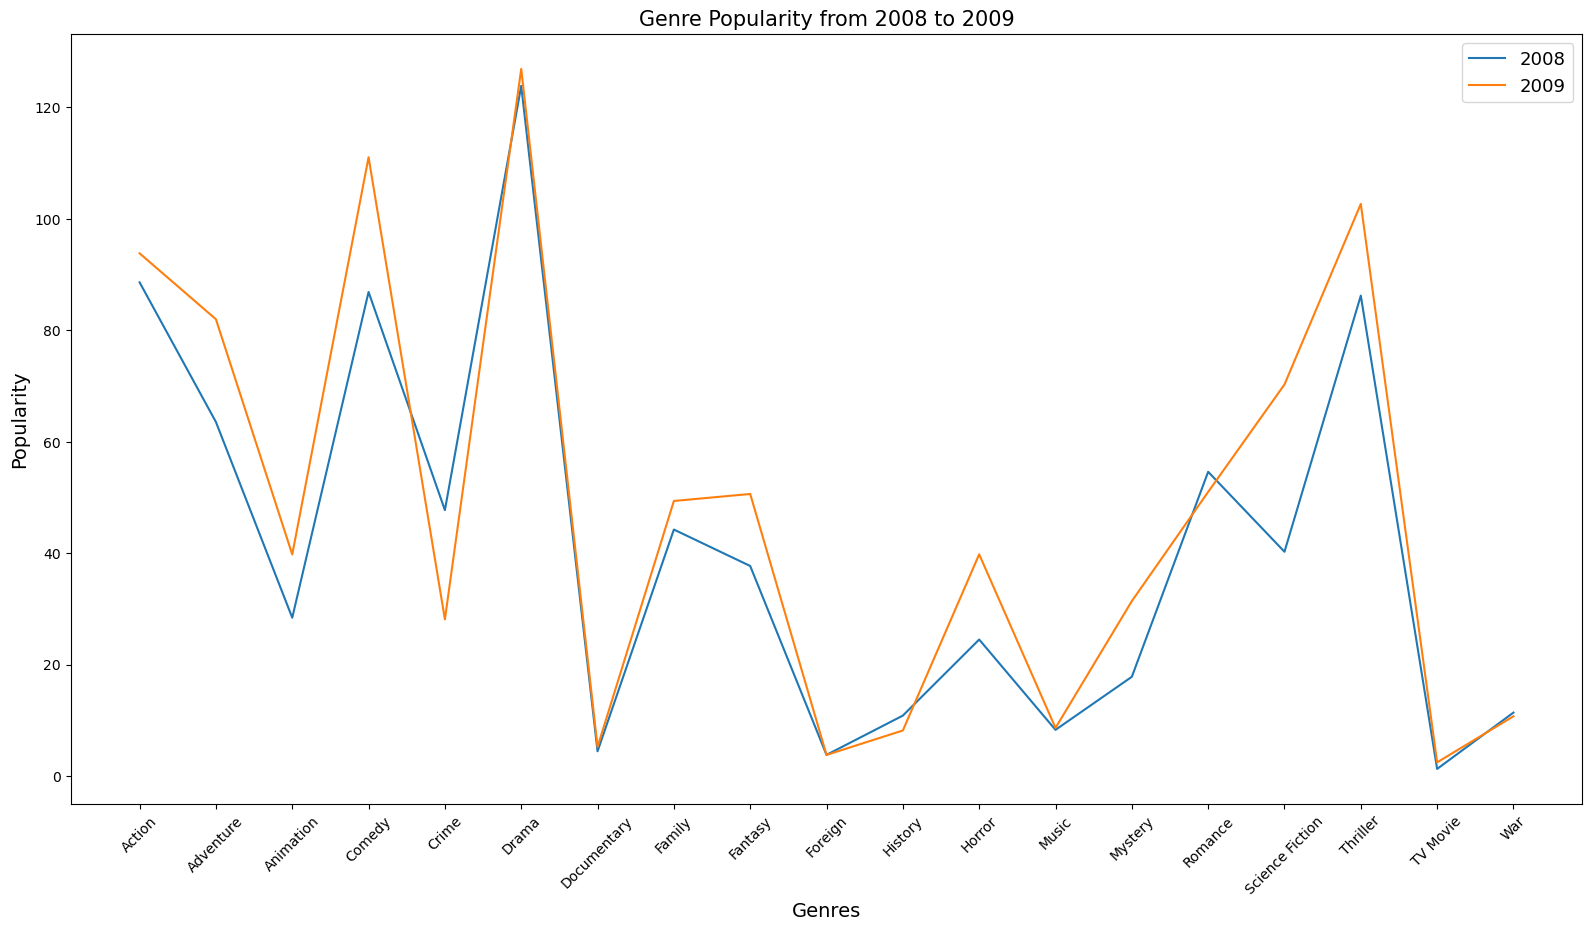

In [237]:
df_genre_popularity_comparison_1.plot.line(rot=45, figsize=(19.5,10)) # creates & displays bar graph for "df_genre_popularity_comparison_1" ("rot=45" ensures x-axis labels are slanted, so "Romance" & "Science Fiction" labels do NOT Collide with each other & ALL Labels can be read)
plt.xlabel('Genres', fontsize=14) # adds x-axis label to bar graph
plt.ylabel('Popularity', fontsize=14) # adds y-axis label to bar graph
plt.title('Genre Popularity from 2008 to 2009', fontsize=15) # adds title to bar graph
plt.xticks(np.arange((19)), df_genre_popularity_comparison_1.index) # ensures ALL Dataframe Index Values are Listed Along x-axis
plt.legend(fontsize=13) # specifies legend size

The code in the cell above plots and displays the popularity of movie genres from 2008 to 2009 on a bar graph. The bar graph shows the amount of popularity for each genre and which popularities increased, decreased, or stayed the same from 2008 to 2009. 

The graph eases the difficulty of making comparisons about which genres are most popular from year to year and provides support for the conclusions about the results.

#### **Display Bar Graph for Second Comparison:**

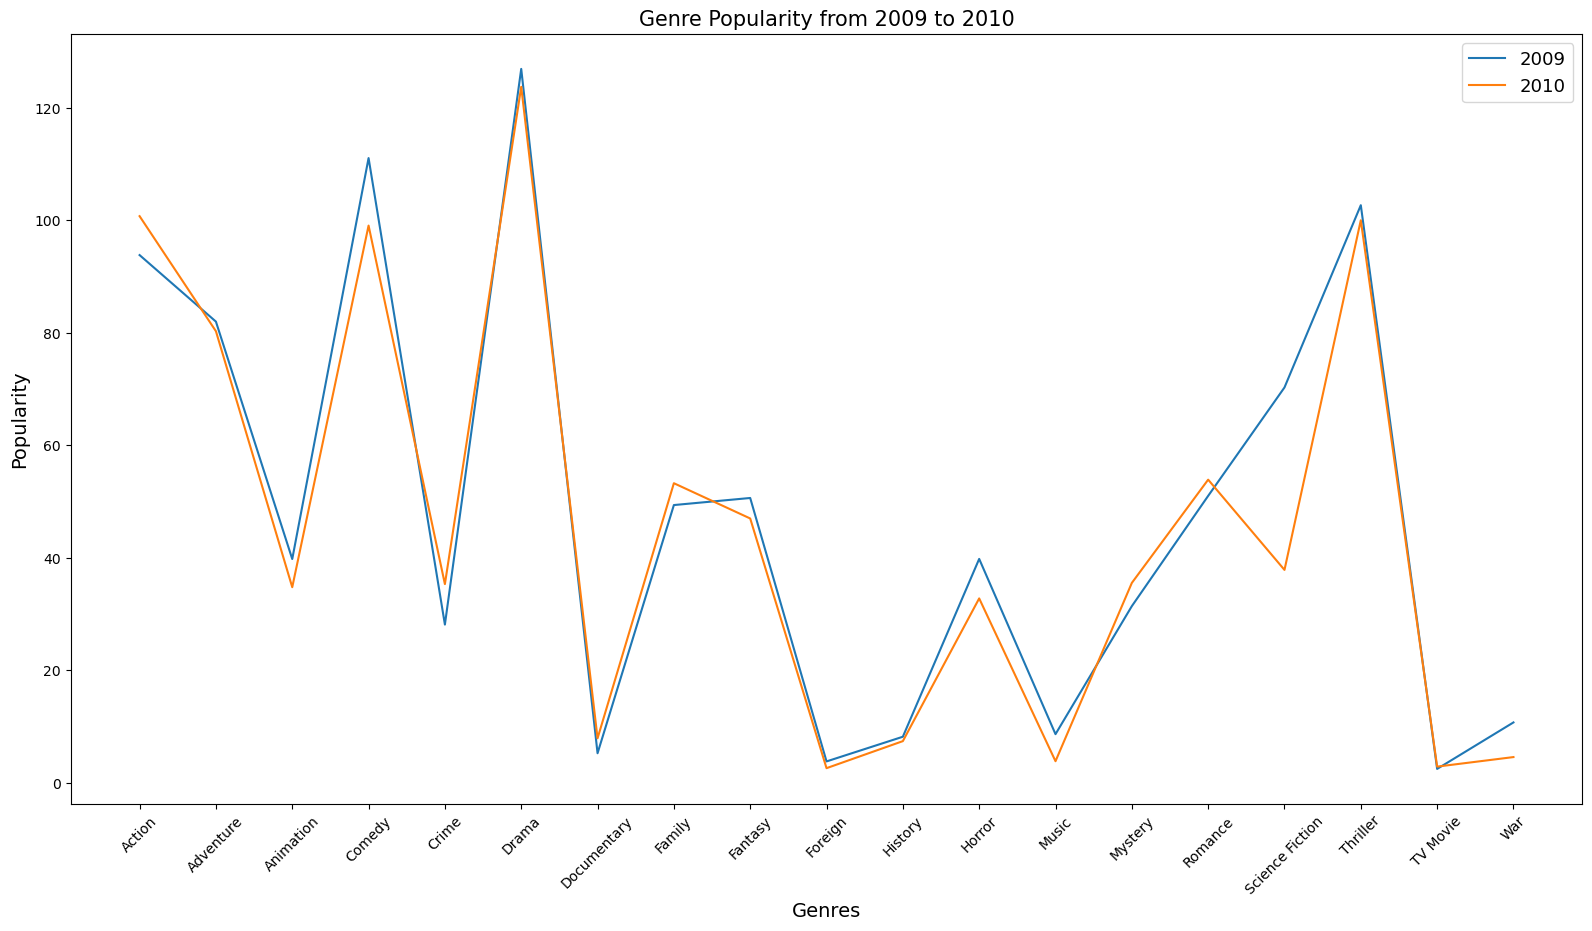

In [238]:
df_genre_popularity_comparison_2.plot.line(rot=45, figsize=(19.5,10)) # creates & displays bar graph for "df_genre_popularity_comparison_2" ("rot=45" ensures x-axis labels are slanted, so "Romance" & "Science Fiction" labels do NOT Collide with each other & ALL Labels can be read)
plt.xlabel('Genres', fontsize=14) # adds x-axis label to bar graph
plt.ylabel('Popularity', fontsize=14) # adds y-axis label to bar graph
plt.title('Genre Popularity from 2009 to 2010', fontsize=15) # adds title to bar graph
plt.xticks(np.arange((19)), df_genre_popularity_comparison_1.index) # ensures ALL Dataframe Index Values are Listed Along x-axis
plt.legend(fontsize=13) # specifies legend size

The code in the cell above plots and displays the popularity of movie genres from 2009 to 2010 on a bar graph. The bar graph shows the amount of popularity for each genre and which popularities increased, decreased, or stayed the same from 2009 to 2010. 

The graph eases the difficulty of making comparisons about which genres are most popular from year to year and provides support for the conclusions about the results.

#### **Display Bar Graph for Third Comparison:**

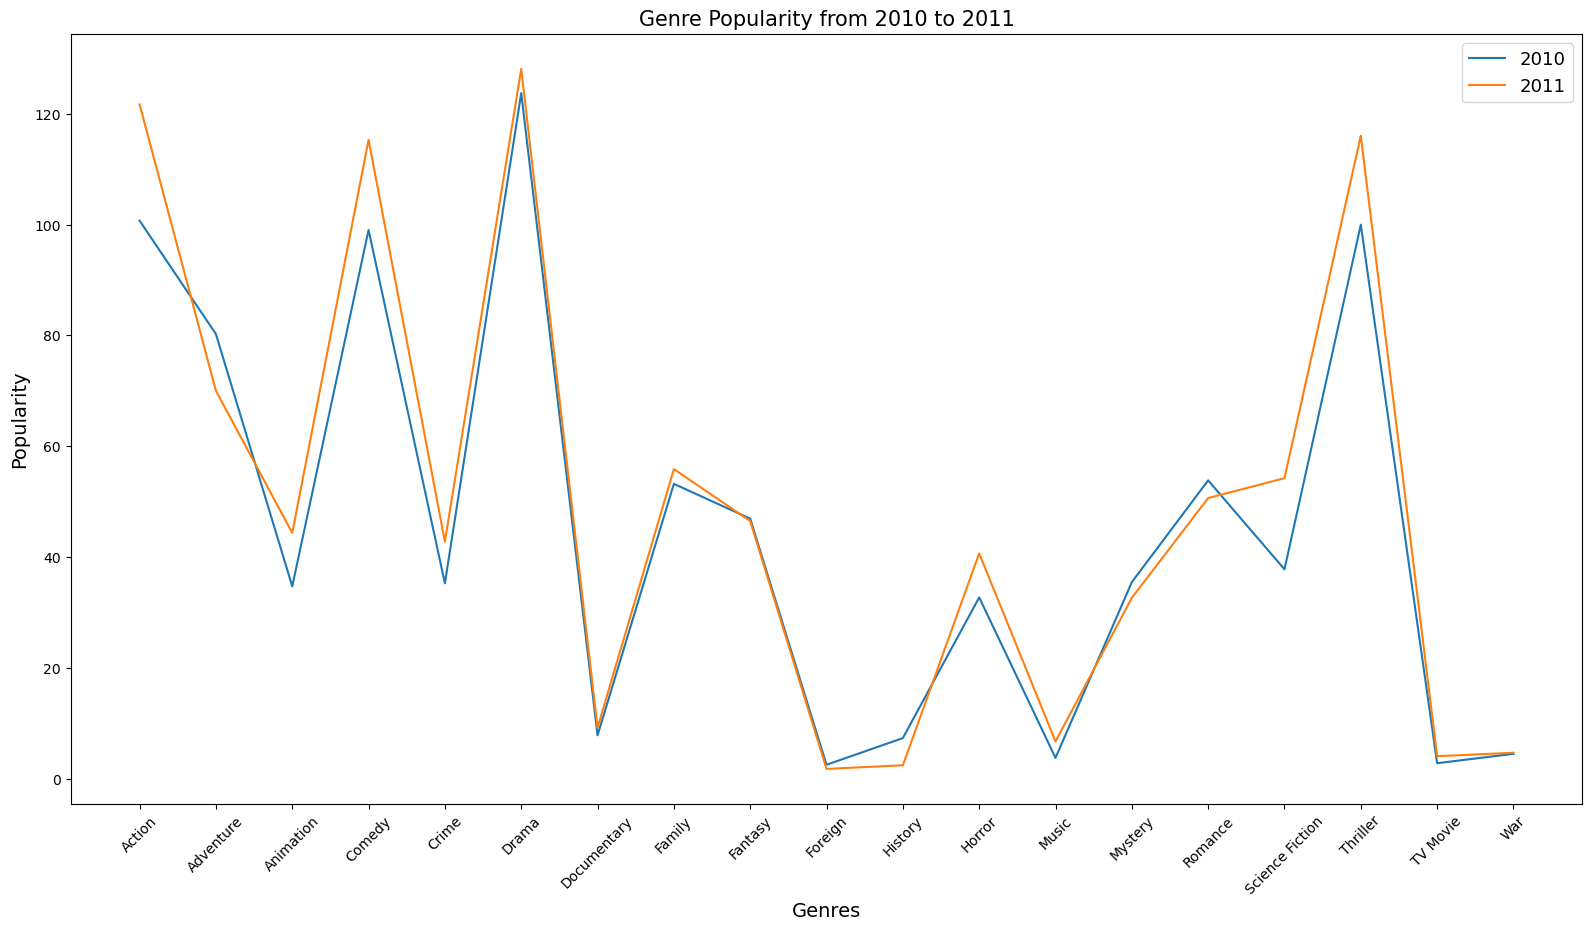

In [239]:
df_genre_popularity_comparison_3.plot.line(rot=45, figsize=(19.5,10)) # creates & displays bar graph for "df_genre_popularity_comparison_3" ("rot=45" ensures x-axis labels are slanted, so "Romance" & "Science Fiction" labels do NOT Collide with each other & ALL Labels can be read)
plt.xlabel('Genres', fontsize=14) # adds x-axis label to bar graph
plt.ylabel('Popularity', fontsize=14) # adds y-axis label to bar graph
plt.title('Genre Popularity from 2010 to 2011', fontsize=15) # adds title to bar graph
plt.xticks(np.arange((19)), df_genre_popularity_comparison_1.index) # ensures ALL Dataframe Index Values are Listed Along x-axis
plt.legend(fontsize=13) # specifies legend size

The code in the cell above plots and displays the popularity of movie genres from 2010 to 2011 on a bar graph. The bar graph shows the amount of popularity for each genre and which popularities increased, decreased, or stayed the same from 2010 to 2011.

The graph eases the difficulty of making comparisons about which genres are most popular from year to year and provides support for the conclusions about the results.

### What movie genres will Tom Cruise most likely be asked to star in?

#### **Create Dataframe to Only Hold Movies that Tom Cruise Cast In:**

In [240]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_Tom_Cruise_movies = df[df['cast'].str.contains('Tom Cruise') == True] # creates dataframe holding only movies that cast Tom Cruise
df_Tom_Cruise_movies # displays dataframe of movies that Tom Cruise cast in

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,177677,tt2381249,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,http://www.missionimpossible.com,Christopher McQuarrie,Desperate Times. Desperate Measures.,...,Ethan and team take on their most impossible m...,131,Action,Paramount Pictures|Skydance Productions|China ...,7/23/15,2349,7.1,2015,1.379999e+08,6.277435e+08
655,137113,tt1631867,3.990452,178000000,370541256,Edge of Tomorrow,Tom Cruise|Emily Blunt|Brendan Gleeson|Bill Pa...,http://www.edgeoftomorrowmovie.com/,Doug Liman,"Live, Die, Repeat",...,Major Bill Cage is an officer who has never se...,113,Action|Science Fiction,Village Roadshow Pictures|Warner Bros.|Viz Med...,5/27/14,3267,7.7,2014,1.639542e+08,3.413022e+08
1971,37834,tt1013743,1.325302,117000000,261930431,Knight and Day,Tom Cruise|Cameron Diaz|Peter Sarsgaard|Viola ...,http://www.knightanddaymovie.com,James Mangold,Every Hit Man Deserves a Second Shot!,...,A fugitive couple goes on a glamorous and some...,109,Action|Comedy,Tree Line Films|Twentieth Century Fox Film Cor...,6/15/10,1045,5.9,2010,1.170000e+08,2.619304e+08
2429,345,tt0120663,1.329827,65000000,162091208,Eyes Wide Shut,Tom Cruise|Nicole Kidman|Madison Eginton|Jacki...,http://eyeswideshut.warnerbros.com/,Stanley Kubrick,Cruise. Kidman. Kubrick.,...,"After Dr. Bill Hartford's wife, Alice, admits ...",159,Drama,Hobby Films|Pole Star|Stanley Kubrick Producti...,7/14/99,623,6.8,1999,8.508844e+07,2.121860e+08
2469,334,tt0175880,0.682531,37000000,48451803,Magnolia,Julianne Moore|William H. Macy|John C. Reilly|...,http://www.magnoliamovie.com/,Paul Thomas Anderson,Things fall down. People look up. And when it ...,...,An epic mosaic of many interrelated characters...,188,Drama,New Line Cinema|Ghoulardi Film Company|The Mag...,12/8/99,430,7.3,1999,4.843496e+07,6.342597e+07
2667,1903,tt0259711,1.131878,68000000,203388341,Vanilla Sky,Tom Cruise|PenÃ©lope Cruz|Cameron Diaz|Kurt Ru...,0,Cameron Crowe,"Forget everything you know, and open your eyes.",...,"David Aames (Tom Cruise) has it all: wealth, g...",136,Drama|Mystery|Romance|Science Fiction|Thriller,Paramount Pictures|Cruise-Wagner Productions|V...,12/10/01,628,6.3,2001,8.374119e+07,2.504703e+08
2833,30416,tt0278736,0.194196,0,0,Stanley Kubrick: A Life in Pictures,Tom Cruise|Stanley Kubrick|Barbara Kroner|Stev...,0,Jan Harlan,0,...,"With commentary from Hollywood stars, outtakes...",141,Documentary,Warner Bros.,5/2/01,20,7.5,2001,0.000000e+00,0.000000e+00
2897,2253,tt0985699,1.845165,75000000,200276000,Valkyrie,Tom Cruise|Carice van Houten|Kenneth Branagh|B...,0,Bryan Singer,Many saw evil. They dared to stop it.,...,"Wounded in Africa during World War II, Nazi Co...",121,Drama|Thriller|History|War,United Artists|Achte Babelsberg Film|Metro-Gol...,12/25/08,725,6.6,2008,7.595900e+07,2.028369e+08
3382,56292,tt1229238,2.952740,145000000,694713380,Mission: Impossible - Ghost Protocol,Tom Cruise|Jeremy Renner|Simon Pegg|Paula Patt...,http://www.missionimpossible.com/,Brad Bird,No Plan. No Backup. No Choice.,...,In the 4th installment of the Mission Impossib...,133,Action|Thriller|Adventure,Paramount Pictures|Skydance Productions|Bad Ro...,12/7/11,3036,6.7,2011,1.405627e+08,6.734538e+08
3921,180,tt0181689,2.103595,102000000,358372926,Minority Report,Tom Cruise|Colin Farrell|Samantha Morton|Max v...,0,Steven Spielberg,The system is perfect until it comes after you.,...,"John Anderton is a top ""Precrime"" cop in the l...",145,Action|Thriller|Science Fiction|Mystery,DreamWorks SKG|Cruise/Wagner Productions|Ambli...,6/20/02,1595,6.9,2002,1.236507e+08,4.344417e+08


The code in the cell above creates a new dataframe that holds only movies that Tom Cruise cast in and displays it. 

Since the analysis question asks for what movie genres that Tom Cruise is most likely to cast in, the dataframe was created to hold only the movies that Tom Cruise cast in to start off the data exploration process.

#### **Create Dataframe to Only Hold Movies that Tom Cruise Cast In with Popularity More Than or Equal to Three:**

In [241]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_most_popular_TC_movies = df_Tom_Cruise_movies[df_Tom_Cruise_movies['popularity'] >= 3] # creates dataframe of movies with popularity more than or equal to 3 that Tom Cruise cast in
df_most_popular_TC_movies # displays dataframe of movies with popularity more than or equal to 3 that Tom Cruise cast in

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,177677,tt2381249,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,http://www.missionimpossible.com,Christopher McQuarrie,Desperate Times. Desperate Measures.,...,Ethan and team take on their most impossible m...,131,Action,Paramount Pictures|Skydance Productions|China ...,7/23/15,2349,7.1,2015,1.379999e+08,6.277435e+08
655,137113,tt1631867,3.990452,178000000,370541256,Edge of Tomorrow,Tom Cruise|Emily Blunt|Brendan Gleeson|Bill Pa...,http://www.edgeoftomorrowmovie.com/,Doug Liman,"Live, Die, Repeat",...,Major Bill Cage is an officer who has never se...,113,Action|Science Fiction,Village Roadshow Pictures|Warner Bros.|Viz Med...,5/27/14,3267,7.7,2014,1.639542e+08,3.413022e+08
5430,75612,tt1483013,4.405923,120000000,286168572,Oblivion,Tom Cruise|Morgan Freeman|Olga Kurylenko|Andre...,http://www.oblivionmovie2013.com/,Joseph Kosinski,Earth is a memory worth fighting for,...,Jack Harper (Tom Cruise) is one of the last fe...,126,Action|Science Fiction|Adventure|Mystery,Universal Pictures|Chernin Entertainment|Relat...,4/10/13,3729,6.3,2013,1.123240e+08,2.678633e+08
6561,956,tt0317919,3.098051,150000000,397850012,Mission: Impossible III,Tom Cruise|Philip Seymour Hoffman|Ving Rhames|...,http://www.missionimpossible.com/,J.J. Abrams,The Mission Begins 05:05:06.,...,Retired from active duty to train new IMF agen...,126,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions|S...,5/3/06,1363,6.3,2006,1.622504e+08,4.303421e+08
8458,954,tt0117060,3.293387,80000000,457696359,Mission: Impossible,Tom Cruise|Jon Voight|Emmanuelle BÃ©art|Henry ...,http://www.missionimpossible.com/,Brian De Palma,Expect the Impossible.,...,"When Ethan Hunt, the leader of a crack espiona...",110,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions,5/21/96,1754,6.5,1996,1.112173e+08,6.362971e+08


The code in the cell above creates a new dataframe that holds movies with a popularity amount of more than or equal to three that Tom Cruise cast in and displays it.
 

The **first** angle that will be used to investigate the analysis question is finding the three genres that were in most of the top five most popular movies that Tom Cruise cast in. The code in the cell above performs the first step of the **first** angle by creating a dataframe that holds movies with popularity more than or equal to three.

#### **Create & Display Dataframe for First Angle of Exploration:**

In [242]:
df_genres_of_top_five_movies = pd.DataFrame([[0], [0], [0], [0], [0]],
                                   index=['Action', 'Adventure', 'Mystery', 'Science Fiction', 'Thriller'],
                                   columns=['Number of Movies Genre is Present in']) # creates dataframe to number of movies genres are present in for first angle
df_genres_of_top_five_movies # displays genre amounts in top 5 movies

,Number of Movies Genre is Present in
Action,0
Adventure,0
Mystery,0
Science Fiction,0
Thriller,0


The code in the cell above creates a new dataframe to hold the sum of each type of genre in the **df_most_popular_TC_movies** dataframe and displays the dataframe.

Since the **df_most_popular_TC_movies** dataframe already displays what genre types are in each movie, the index of the dataframe only has the genre types that are displayed in the **'genres'** column of the **df_most_popular_TC_movies** dataframe. This dataframe will be used create the graph for the **first** angle of the exploration process to answer the second analysis question.

#### **Find & Input Genre Sums into Dataframe for First Angle of Exploration:**

In [243]:
# Must input genre type sums into "df_genres_of_top_five_movies" dataframe this way because indices of "df_most_popular_TC_movies" dataframe Are Held In The Form Of SERIES VALUES, therefore they CANNOT be used in a for loop

df_genres_of_top_five_movies.loc['Action', 'Number of Movies Genre is Present in'] = df_most_popular_TC_movies['genres'].str.contains('Action').sum() # finds sum of 'Action' genres in 'genres' column of "df_most_popular_TC_movies" dataframe
df_genres_of_top_five_movies.loc['Adventure', 'Number of Movies Genre is Present in'] = df_most_popular_TC_movies['genres'].str.contains('Adventure').sum() # finds sum of 'Adventure' genres in 'genres' column of "df_most_popular_TC_movies" dataframe
df_genres_of_top_five_movies.loc['Mystery', 'Number of Movies Genre is Present in'] = df_most_popular_TC_movies['genres'].str.contains('Mystery').sum() # finds sum of 'Mystery' genres in 'genres' column of "df_most_popular_TC_movies" dataframe
df_genres_of_top_five_movies.loc['Science Fiction', 'Number of Movies Genre is Present in'] = df_most_popular_TC_movies['genres'].str.contains('Science Fiction').sum() # finds sum of 'Science Fiction' genres in 'genres' column of "df_most_popular_TC_movies" dataframe
df_genres_of_top_five_movies.loc['Thriller', 'Number of Movies Genre is Present in'] = df_most_popular_TC_movies['genres'].str.contains('Thriller').sum() # finds sum of 'Thriller' genres in 'genres' column of "df_most_popular_TC_movies" dataframe

df_genres_of_top_five_movies # displays genre amounts in top 5 movies

,Number of Movies Genre is Present in
Action,5
Adventure,3
Mystery,1
Science Fiction,2
Thriller,2


The code in the cell above finds the amount of movies that each genre type is present in. Then the code inputs them into the **df_genres_of_top_five_movies** dataframe and displays it.

The **df_genres_of_top_five_movies** dataframe will be used to create the graph that will be used to answer the second analysis question for the **first** angle.

#### **Display Bar Graph for First Angle of Exploration:**

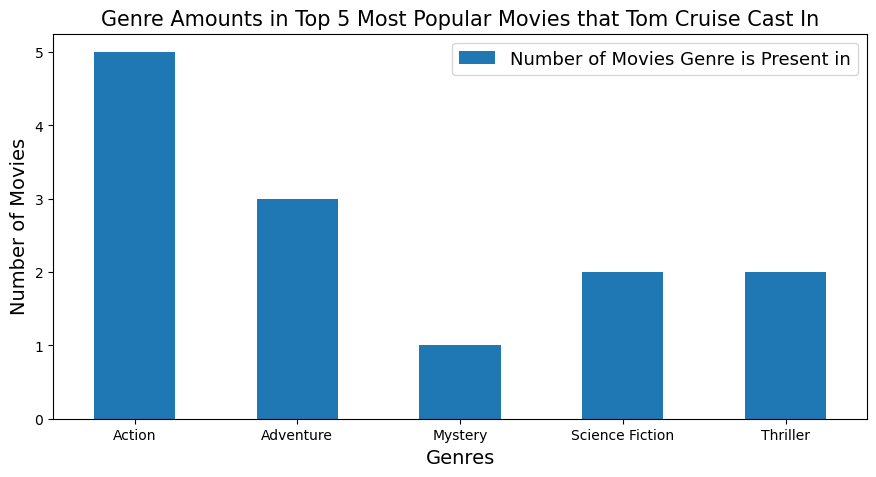

In [244]:
df_genres_of_top_five_movies.plot.bar(rot=0, figsize=(10.5,5)) # displays bar graph ("rot=0" ensures x-axis labels are horizontal, so labels can be read)
plt.xlabel('Genres', fontsize=14) # adds x-axis label to bar graph
plt.ylabel('Number of Movies', fontsize=14) # adds y-axis label to graph
plt.title('Genre Amounts in Top 5 Most Popular Movies that Tom Cruise Cast In', fontsize=15) # adds title to bar graph
plt.legend(fontsize=13) # specifies legend size

The code in the cell above plots and displays the amount of movies that each genre type is present in, in the top five most popular movies that Tom Cruise cast in on a bar graph.

The graph shows which genre types had the most appearances in the movies and provides support for the conclusions about the results from the **first** angle of exploration.

#### **Create Dataframe for Second Angle of Exploration:**

In [245]:
df_genre_percents = pd.DataFrame([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]], 
                                 index = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                                          'Science Fiction', 'Thriller', 'TV Movie', 'War'], 
                                 columns = ['Number of Movies Cast In']) # creates new dataframe to hold actors & movie amounts
df_genre_percents # displays genre amounts in all movies shown in Cell 1

,Number of Movies Cast In
Action,0
Adventure,0
Animation,0
Comedy,0
Crime,0
Drama,0
Documentary,0
Family,0
Fantasy,0
Foreign,0


The code in the cell above creates a new dataframe to hold the sum of each type of genre in the **df_Tom_Cruise_movies** dataframe and displays the dataframe.

The **second** angle that will be used to investigate the analysis question is finding the three genres that were in most of the movies that Tom Cruise cast in shown the **df_Tom_Cruise_movies** dataframe. The **df_genre_percents** dataframe will be used create the graph for the **second** angle of the exploration process to answer the second analysis question.

#### **Find & Input Genre Sums into Dataframe for Second Angle of Exploration:**

In [246]:
# Must input genre type sums into "df_genre_percents" dataframe this way because indices of "df_Tom_Cruise_movies" dataframe Are Held In The Form Of SERIES VALUES, therefore they CANNOT be used in a for loop

df_genre_percents.loc['Action', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Action').sum() # finds sum of 'Action' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Adventure', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Adventure').sum() # finds sum of 'Adventure' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Animation', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Animation').sum() # finds sum of 'Animation' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Comedy', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Comedy').sum() # finds sum of 'Comedy' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Crime', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Crime').sum() # finds sum of 'Mystery' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Drama', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Drama').sum() # finds sum of 'Science Fiction' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Documentary', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Documentary').sum() # finds sum of 'Documentary' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Family', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Family').sum() # finds sum of 'Family' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Fantasy', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Fantasy').sum() # finds sum of 'Fantasy' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Foreign', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Foreign').sum() # finds sum of 'Foreign' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['History', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('History').sum() # finds sum of 'Mystery' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Horror', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Horror').sum() # finds sum of 'Science Fiction' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Music', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Music').sum() # finds sum of 'Music' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Mystery', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Mystery').sum() # finds sum of 'Mystery' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Romance', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Romance').sum() # finds sum of 'Mystery' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Science Fiction', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Science Fiction').sum() # finds sum of 'Science Fiction' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['Thriller', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('Thriller').sum() # finds sum of 'Thriller' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['TV Movie', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('TV Movie').sum() # finds sum of 'Science Fiction' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe
df_genre_percents.loc['War', 'Number of Movies Cast In'] = df_Tom_Cruise_movies['genres'].str.contains('War').sum() # finds sum of 'War' genres in 'genres' column of "df_Tom_Cruise_movies" dataframe

df_genre_percents # displays genre amounts in all movies shown in Cell 1

,Number of Movies Cast In
Action,13
Adventure,10
Animation,0
Comedy,5
Crime,2
Drama,20
Documentary,2
Family,0
Fantasy,1
Foreign,0


The code in the cell above finds the amount of movie genres that Tom Cruise cast in over all the movies in the dataframe **df_Tom_Cruise_movies**. Then the code inputs them into the **df_genre_percents** dataframe and displays it.

The **df_genre_percents** dataframe will be used to create the graph that will be used to answer the second analysis question for the **second** angle.

#### **Display Bar Graph for Second Angle of Exploration:**

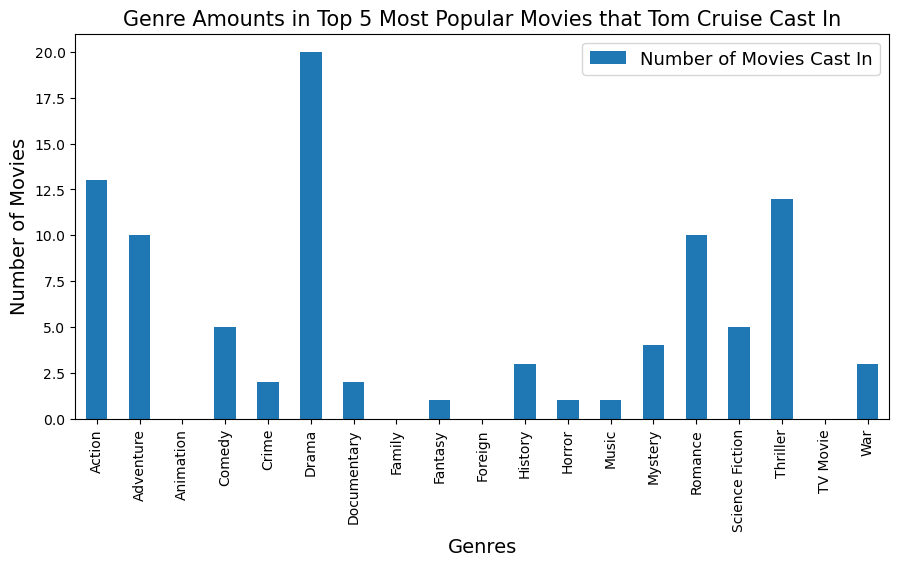

In [247]:
df_genre_percents.plot.bar(rot=90, figsize=(10.5,5)) # displays bar graph (used "rot=90" ensures x-axis labels are vertical, so labels can be read)
plt.xlabel('Genres', fontsize=14) # adds x-axis label to bar graph
plt.ylabel('Number of Movies', fontsize=14) # adds y-axis label to graph
plt.title('Genre Amounts in Top 5 Most Popular Movies that Tom Cruise Cast In', fontsize=15) # adds title to bar graph
plt.legend(fontsize=13) # specifies legend size

The code in the cell above plots and displays a pie chart of the percentage of movie genres that Tom Cruise cast in over all the movies in the dataframe **df_Tom_Cruise_movies**. 

The chart shows the percentages of all the movie genres that Tom Cruise cast in and provides support for the conclusions about the results from the **second** angle of exploration.

#### **Create & Display Dataframe for Third Angle of Exploration:**

In [248]:
df_highest_TC_revenue = df_Tom_Cruise_movies[df_Tom_Cruise_movies['revenue'] >= 400000000] # creates dataframe of movies with revenue more than or equal to 50K that Tom Cruise cast in
df_highest_TC_revenue # displays dataframe of movies with revenue more than or equal to 50K that Tom Cruise cast in

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,177677,tt2381249,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,http://www.missionimpossible.com,Christopher McQuarrie,Desperate Times. Desperate Measures.,...,Ethan and team take on their most impossible m...,131,Action,Paramount Pictures|Skydance Productions|China ...,7/23/15,2349,7.1,2015,1.379999e+08,6.277435e+08
3382,56292,tt1229238,2.952740,145000000,694713380,Mission: Impossible - Ghost Protocol,Tom Cruise|Jeremy Renner|Simon Pegg|Paula Patt...,http://www.missionimpossible.com/,Brad Bird,No Plan. No Backup. No Choice.,...,In the 4th installment of the Mission Impossib...,133,Action|Thriller|Adventure,Paramount Pictures|Skydance Productions|Bad Ro...,12/7/11,3036,6.7,2011,1.405627e+08,6.734538e+08
4976,616,tt0325710,1.622536,140000000,456758981,The Last Samurai,Tom Cruise|Ken Watanabe|William Atherton|Chad ...,0,Edward Zwick,"In the face of an enemy, in the Heart of One M...",...,Nathan Algren is an American hired to instruct...,154,Drama|Action|War|History,Cruise/Wagner Productions|Warner Bros.|Radar P...,12/5/03,1093,7.1,2003,1.659494e+08,5.414205e+08
6205,74,tt0407304,1.844731,132000000,591739379,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,0,Steven Spielberg,They're already here.,...,The extraordinary battle for the future of hum...,116,Adventure|Thriller|Science Fiction,Paramount Pictures|DreamWorks SKG|Cruise/Wagne...,6/28/05,1238,5.9,2005,1.473864e+08,6.607145e+08
8458,954,tt0117060,3.293387,80000000,457696359,Mission: Impossible,Tom Cruise|Jon Voight|Emmanuelle BÃ©art|Henry ...,http://www.missionimpossible.com/,Brian De Palma,Expect the Impossible.,...,"When Ethan Hunt, the leader of a crack espiona...",110,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions,5/21/96,1754,6.5,1996,1.112173e+08,6.362971e+08
8666,955,tt0120755,1.956406,125000000,546388105,Mission: Impossible II,Tom Cruise|Dougray Scott|Thandie Newton|Ving R...,http://www.missionimpossible.com/,John Woo,Expect the impossible again,...,With computer genius Luther Stickell at his si...,123,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions|M...,5/23/00,1269,5.8,2000,1.582865e+08,6.918869e+08


The code in the cell above creates a new dataframe that holds movies with a revenue amount of more than or equal to four hundred million that Tom Cruise cast in and displays it.

The **third** angle that will be used to investigate the analysis question is finding the three genres that were most of the movies with the six highest revenues that Tom Cruise cast in. The high revenue indicates that there was more money made from making the movie, meaning that Tom Cruise is more likely to be asked to cast in that movie. The code in the cell above performs the first step of the **third** angle by creating a dataframe that holds movies with a revenue amount of more than or equal to four hundred million.

#### **Create & Display Dataframe for Third Angle of Exploration:**

In [249]:
df_highest_revenue_genres = pd.DataFrame([[0], [0], [0], [0], [0], [0], [0]],
                                         index=['Action', 'Adventure', 'Drama', 'History', 'Science Fiction', 'Thriller', 'War'],
                                         columns=['Number of Movies Genre is Present in']) # creates dataframe to number of movies genres are present in for first angle
df_highest_revenue_genres # displays genre amounts in movies with 6 highest revenues

,Number of Movies Genre is Present in
Action,0
Adventure,0
Drama,0
History,0
Science Fiction,0
Thriller,0
War,0


The code in the cell above creates a new dataframe to hold the sum of each type of genre in the df_most_popular_TC_movies dataframe and displays the dataframe.

Since the **df_highest_TC_revenue** dataframe already displays what genre types are in each movie, the index of the dataframe only has the genre types that are displayed in the **df_highest_TC_revenue**. The **df_highest_revenue_genres** dataframe will be used create the graph for the **third** angle of the exploration process to answer the second analysis question.

#### **Find & Input Genre Sums into Dataframe for Third Angle of Exploration:**

In [250]:
# Must input genre type sums into "df_highest_revenue_genres" dataframe this way because indices of "df_highest_TC_revenue" dataframe Are Held In The Form Of SERIES VALUES, therefore they CANNOT be used in a for loop

df_highest_revenue_genres.loc['Action', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('Action').sum() # finds sum of 'Action' genres in 'genres' column of "df_highest_TC_revenue" dataframe
df_highest_revenue_genres.loc['Adventure', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('Adventure').sum() # finds sum of 'Adventure' genres in 'genres' column of "df_highest_TC_revenue" dataframe
df_highest_revenue_genres.loc['Drama', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('Drama').sum() # finds sum of 'Drama' genres in 'genres' column of "df_highest_TC_revenue" dataframe
df_highest_revenue_genres.loc['History', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('History').sum() # finds sum of 'History' genres in 'genres' column of "df_highest_TC_revenue" dataframe
df_highest_revenue_genres.loc['Science Fiction', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('Science Fiction').sum() # finds sum of 'Science Fiction' genres in 'genres' column of "df_highest_TC_revenue" dataframe
df_highest_revenue_genres.loc['Thriller', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('Thriller').sum() # finds sum of 'Thriller' genres in 'genres' column of "df_highest_TC_revenue" dataframe
df_highest_revenue_genres.loc['War', 'Number of Movies Genre is Present in'] = df_highest_TC_revenue['genres'].str.contains('War').sum() # finds sum of 'War' genres in 'genres' column of "df_highest_TC_revenue" dataframe

df_highest_revenue_genres # displays genre amounts in movies with 6 highest revenues

,Number of Movies Genre is Present in
Action,5
Adventure,4
Drama,1
History,1
Science Fiction,1
Thriller,4
War,1


The code in the cell above finds the sum of movies that each genre type is present in. Then the code inputs them into the **df_highest_revenue_genres** dataframe and displays it.

The **df_highest_revenue_genres** dataframe will be used to create the graph that will be used to answer the second analysis question for the **third** angle.

#### **Display Bar Graph for Third Angle of Exploration:**

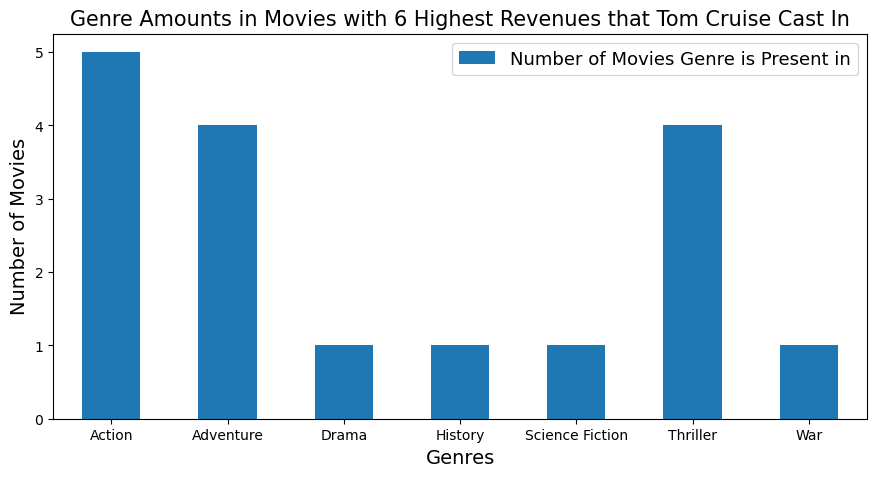

In [251]:
df_highest_revenue_genres.plot.bar(rot=0, figsize=(10.5,5)) # displays bar graph ("rot=0" ensures x-axis labels are horizontal, so labels can be read)
plt.xlabel('Genres', fontsize=14) # adds x-axis label to bar graph
plt.ylabel('Number of Movies', fontsize=14) # adds y-axis label to graph
plt.title('Genre Amounts in Movies with 6 Highest Revenues that Tom Cruise Cast In', fontsize=15) # adds title to bar graph
plt.legend(fontsize=13) # specifies legend size

The code in the cell above plots and displays the amount of movies that each genre type is present in, in the movies with the six highest revenues that Tom Cruise cast in on a bar graph.

The graph shows which genre types had the most appearances in the movies and provides support for the conclusions about the results from the **third** angle of exploration.

<a id='conclusions'></a>
## Conclusions





#### **Analysis Question 1: Which genres are most popular from year to year?**

The **method** that is used to find the most popular genres from year to year is first finding which genre popularities either increased, stayed the same, or decreased by a small amount between two consecutive years. Next, finding which of those genres had the most popularity for the same consecutive years. Finally, comparing the two findings and seeing which genres appear in both findings. Those genres will be the most popular genres from year to year for each comparison between two years. This method is used three times to make three comparisons of popular genres between three pairs of consecutive years and use those comparisons to find the most popular genres from year to year. Since two years are the minimum amount needed to find the most popular genres from year to year, the genre popularity is compared within a range of four years to make the three comparisons of the genre popularity between 2008-2009, 2009-2010, and 2010-2011. 

One **limitation** to this method of exploration is that it only checks movies from 2008 to 2011. **Additional research** can be done by checking and making comparisons of the genre popularity of movies released during the years other than from 2008 to 2011 to find **additional information**.

For the **first** comparison, the bar graph for the **first** comparison of the first analysis question shows that fourteen genres increased in popularity, one genre had a large decrease in popularity, three genres had a small decrease in popularity, and one genre had the same popularity from 2008 to 2009. The genres that had an increase in popularity were _Action_, _Adventure_, _Animation_, _Comedy_, _Drama_, _Documentary_, _Family_, _Fantasy_, _Horror_, _Music_, _Mystery_, _Science Fiction_, _Thriller_, and _TV Movie_. The genre that had a large decrease in popularity was _Crime_. The genres that had a small decrease in popularity were _History_, _Romance_, and _War_. And the only genre that stayed the same in popularity was _Foreign_. According to these **results** of genres that either increased, stayed the same, or decreased by a small amount in popularity, it narrows down the most popular genres from year to year to be _Action_, _Adventure_, _Animation_, _Comedy_, _Drama_, _Documentary_, _Family_, _Fantasy_, _Foreign_, _History_, _Horror_, _Music_, _Mystery_, _Romance_, _Science Fiction_, _Thriller_, _TV Movie_, and _War_. The **results** in the graph for the **first** comparison also show that the genres that had the most popularity from 2008 to 2009 were _Action_, _Comedy_, _Drama_, and _Thriller_. According to the **result** of genres that had the most popularity from 2008 to 2009, it further narrows down the most popular genres to be _Action_, _Comedy_, _Drama_, and _Thriller_. 
These graph **findings** of the graph for the **first** comparison conclude that the most popular genres from 2008 and 2009 are **_Action_**, **_Comedy_**, **_Drama_**, and **_Thriller_** for the **first** comparison.

For the **second** comparison, the bar graph for the **second** comparison of the first analysis question shows that seven genres increased in popularity, five genre had a large decrease in popularity, seven genres had a small decrease in popularity, and zero genres had the same popularity from 2009 to 2010. The genres that had an increase in popularity were _Action_, _Crime_, _Documentary_, _Family_, _Mystery_, _Romance_, and _TV Movie_. The genre that had a large decrease in popularity was _Comedy_, _Horror_, _Music_, _Science Fiction_, and _War_. The genres that had a small decrease in popularity were _Adventure_, _Animation_, _Drama_, _Fantasy_, _Foreign_, _History_, and _Thriller_. According to the **results** of genres that either increased or decreased by a small amount in popularity, it narrows down the most popular genres from year to year to be _Action_, _Adventure_,  _Animation_, _Crime_, _Drama_, _Documentary_, _Family_, _Fantasy_, _Foreign_, _History_, _Mystery_, _Romance_, _Thriller_, and _TV Movie_. The **results** in the graph for the **second** comparison also show that the genres that had the most popularity from 2009 to 2010 were _Action_, _Comedy_, _Drama_, and _Thriller_. According to the **result** of genres that had the most popularity from 2009 to 2010, it further narrows down the most popular genres to be _Action_, _Drama_, and _Thriller_. 
These graph **findings** of the graph for the **third** comparison conclude that the most popular genres from 2009 and 2010 are **_Action_**, **_Drama_**, and **_Thriller_** for the **second** comparison.

For the **third** comparison, the bar graph for the **third** comparison of the first analysis question shows that thirteen genres increased in popularity, two genres had a large decrease in popularity, four genres had a small decrease in popularity, and zero genres had the same popularity from 2010 to 2011. The genres that had an increase in popularity were _Action_, _Animation_, _Comedy_, _Crime_, _Drama_, _Documentary_, _Family_, _Horror_, _Music_, _Science Fiction_, _Thriller_, _TV Movie_, and _War_. The genre that had a large decrease in popularity were _Adventure_ and _History_. The genres that had a small decrease in popularity were _Fantasy_, _Foreign_, _Mystery_, and _Romance_. According to the **results** of genres that either increased or decreased by a small amount in popularity, this narrows down the most popular genres from year to year to be _Action_, _Animation_, _Comedy_, _Crime_, _Drama_, _Documentary_, _Family_, _Fantasy_, _Foreign_, _Horror_, _Music_, _Mystery_, _Romance_, _Science Fiction_, _Thriller_, _TV Movie_, and _War_. The **results** in the graph for the **third** comparison also show that the genres that had the most popularity from 2010 to 2011 were _Action_, _Comedy_, _Drama_, and _Thriller_. According to the **result** of genres that had the most popularity from 2010 to 2011, it further narrows down the most popular genres to be _Action_, _Comedy_, _Drama_, and _Thriller_. 
These graph **findings** of the graph for the **third** comparison conclude that the most popular genres from 2010 and 2011 are **_Action_**, **_Comedy_**, **_Drama_**, and **_Thriller_**.


These three comparisons ultimately narrow down the genres that are the most popular from year to year to be **_Action_**, **_Drama_**, and **_Thriller_**.

#### **Analysis Question 2: What movie genres will Tom Cruise most likely be asked to star in?**

The analysis question was investigated at **three angles** to answer the question.

To start off the exploration process for all **three angles**, a dataframe was created to hold only the movies that Tom Cruise cast in. It was the dataframe that was used for all **three angles**.

One **limitation** to the **three angles** of exploration is that there are only thirty-seven movies to look at data from. Another limitation is that the **first** angle only uses three movies and the **third** angle uses six movies. **Additional research** can be done by increasing the scope of movies that the first and third angles use to find **additional information**.

For the **first** angle, the top five most popular movies were first found, next the genres of those movies were found, finally the genres that were in all five movies were compared. The three genres that were present in most of the five movies are the movie genres that Tom Cruise is most likely to be asked to star in. The bar graph for the **first** angle of exploration shows that there were four genres that Tom Cruise is most likely to be asked to star in. The four genres are **_Action_**, **_Adventure_**, **_Science Fiction_**, and **_Thriller_**. The genres, **_Science Fiction_** and **_Thriller_**, were in the same amount of movies.

For the **second** angle, the sum of genres for the total amount of movies shown in the dataframe holding only the movies that Tom Cruise cast in were first found. Then the sums were plotted onto a pie chart to show the percentage of genres that Tom Cruise cast in. The three genres that have the highest percentages are the movie genres that Tom Cruise is most likely to be asked to cast in. The bar graph for the **second** angle of exploration shows that the three movie genres that Tom Cruise is most likely to be asked to cast in are **_Action_**, **_Drama_**, and **_Thriller_**.

For the **third** angle, the movies with the six highest revenues that Tom Cruise cast in were first found, next the genres of those movies were found, finally the genres that were in all six movies were compared. The three genres that were present in most of the six movies are the movie genres that Tom Cruise is most likely to be asked to star in. The bar graph for the **third** angle of exploration shows that the three movie genres that Tom Cruise is most likely to be asked to cast in are **_Action_**, **_Adventure_**, and **_Thriller_**. 

These three angles of exploration ultimately narrow down the genres that are the most popular from year to year to be **_Action_** and **_Thriller_**.

## Submitting your Project 



In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb